In [121]:
# imports 

import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# sklearn imports
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

sns.set()
%matplotlib inline

# Data Setup for Regression Models

In [137]:
df = pd.read_csv('data/cleaned.csv')
df.head()

,country,total_vaccinations_x,amount_of_days,Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share,region,sub-region,vaccine,total_vaccinations_y,days_to_make_vaccines,amount_vaccines_needed
0,Afghanistan,422200.0,59,39074280,2.33 %,886592,60,652860,-62920.0,4.6,18,25 %,0.50 %,Asia,Southern Asia,0,0.0,0.0,0.0
1,Albania,11295390.0,59,2877239,-0.11 %,-3120,105,27400,-14000.0,1.6,36,63 %,0.04 %,Europe,Southern Europe,0,0.0,0.0,0.0
2,Algeria,75030.0,59,43984569,1.85 %,797990,18,2381740,-10000.0,3.1,29,73 %,0.56 %,Africa,Northern Africa,0,0.0,0.0,0.0
3,Andorra,185420.0,59,77287,0.16 %,123,164,470,0.0,N.A.,N.A.,88 %,0.00 %,Europe,Southern Europe,0,0.0,0.0,0.0
4,Angola,1551757.0,59,33032075,3.27 %,1040977,26,1246700,6413.0,5.6,17,67 %,0.42 %,Africa,Sub-Saharan Africa,0,0.0,0.0,0.0


In [138]:
def convert_float(value):
    return float(value[:4])
    
df['World Share'] = df['World Share'].apply(convert_float)
df.head()

,country,total_vaccinations_x,amount_of_days,Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share,region,sub-region,vaccine,total_vaccinations_y,days_to_make_vaccines,amount_vaccines_needed
0,Afghanistan,422200.0,59,39074280,2.33 %,886592,60,652860,-62920.0,4.6,18,25 %,0.50,Asia,Southern Asia,0,0.0,0.0,0.0
1,Albania,11295390.0,59,2877239,-0.11 %,-3120,105,27400,-14000.0,1.6,36,63 %,0.04,Europe,Southern Europe,0,0.0,0.0,0.0
2,Algeria,75030.0,59,43984569,1.85 %,797990,18,2381740,-10000.0,3.1,29,73 %,0.56,Africa,Northern Africa,0,0.0,0.0,0.0
3,Andorra,185420.0,59,77287,0.16 %,123,164,470,0.0,N.A.,N.A.,88 %,0.00,Europe,Southern Europe,0,0.0,0.0,0.0
4,Angola,1551757.0,59,33032075,3.27 %,1040977,26,1246700,6413.0,5.6,17,67 %,0.42,Africa,Sub-Saharan Africa,0,0.0,0.0,0.0


In [139]:
def convert_float_space(value):
    if value != 'N.A.':
        return float(value.split(' ')[0])/100
    else:
        return 0
    
df['Urban Pop %'] = df['Urban Pop %'].apply(convert_float_space)
df['Yearly Change'] = df['Yearly Change'].apply(convert_float_space)
df.head()

,country,total_vaccinations_x,amount_of_days,Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share,region,sub-region,vaccine,total_vaccinations_y,days_to_make_vaccines,amount_vaccines_needed
0,Afghanistan,422200.0,59,39074280,0.0233,886592,60,652860,-62920.0,4.6,18,0.25,0.50,Asia,Southern Asia,0,0.0,0.0,0.0
1,Albania,11295390.0,59,2877239,-0.0011,-3120,105,27400,-14000.0,1.6,36,0.63,0.04,Europe,Southern Europe,0,0.0,0.0,0.0
2,Algeria,75030.0,59,43984569,0.0185,797990,18,2381740,-10000.0,3.1,29,0.73,0.56,Africa,Northern Africa,0,0.0,0.0,0.0
3,Andorra,185420.0,59,77287,0.0016,123,164,470,0.0,N.A.,N.A.,0.88,0.00,Europe,Southern Europe,0,0.0,0.0,0.0
4,Angola,1551757.0,59,33032075,0.0327,1040977,26,1246700,6413.0,5.6,17,0.67,0.42,Africa,Sub-Saharan Africa,0,0.0,0.0,0.0


In [140]:
le = LabelEncoder()

for col in df.columns.values:
    if df[col].dtype == 'object':
        df[col]=le.fit_transform(df[col])
        
df.head()

,country,total_vaccinations_x,amount_of_days,Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share,region,sub-region,vaccine,total_vaccinations_y,days_to_make_vaccines,amount_vaccines_needed
0,0,422200.0,59,39074280,0.0233,886592,60,652860,-62920.0,33,3,0.25,0.50,2,12,0,0.0,0.0,0.0
1,1,11295390.0,59,2877239,-0.0011,-3120,105,27400,-14000.0,5,21,0.63,0.04,3,13,0,0.0,0.0,0.0
2,2,75030.0,59,43984569,0.0185,797990,18,2381740,-10000.0,20,14,0.73,0.56,0,7,0,0.0,0.0,0.0
3,3,185420.0,59,77287,0.0016,123,164,470,0.0,43,34,0.88,0.00,3,13,0,0.0,0.0,0.0
4,4,1551757.0,59,33032075,0.0327,1040977,26,1246700,6413.0,39,2,0.67,0.42,0,14,0,0.0,0.0,0.0


# Training and Testing Data

In [141]:
X = df[['Population (2020)', 'total_vaccinations_y', 'sub-region']]
y = df['total_vaccinations_x']

scaler = MinMaxScaler()
scaled_X = scaler.fit_transform(X)

In [142]:
X_train, X_test, y_train, y_test = train_test_split(
   scaled_X, y, test_size=0.15, random_state=48)

# LinearRegression

In [150]:
model = LinearRegression()
model.fit(X_train, y_train)
r2_test = model.score(X_test,y_test)
r2_train = model.score(X_train,y_train)
print(r2_train, r2_test)
y_pred = model.predict(X_test)
print(mean_squared_error(y_test, y_pred))

0.9297493898512511 0.6199456194864914
3.8198082831060557e+18


In [151]:
df_results_lr = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_results_lr['Residual'] = df_results_lr['Actual'] - df_results_lr['Predicted']
df_results_lr.head()

,Actual,Predicted,Residual
61,1.263981e+09,2.314892e+09,-1.050911e+09
78,6.032832e+08,1.557576e+09,-9.542924e+08
93,4.942361e+06,4.832476e+07,-4.338240e+07
73,2.693554e+06,-8.805342e+06,1.149890e+07
158,4.304170e+05,6.368018e+07,-6.324976e+07


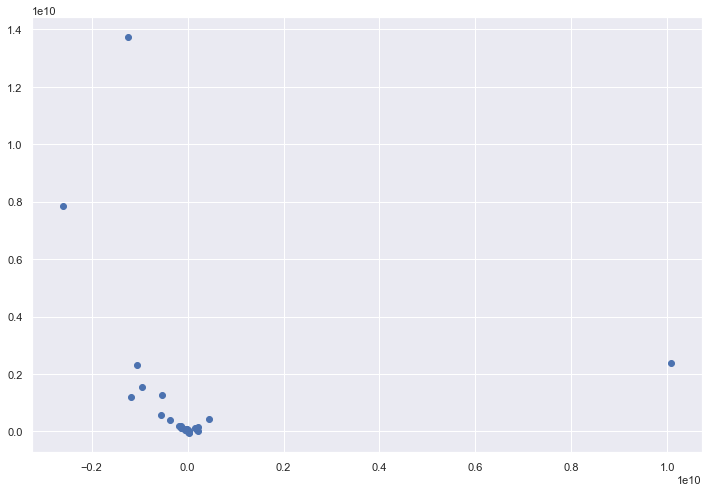

In [152]:
plt.figure(figsize=(12,8))
plt.scatter(df_results_lr['Residual'], df_results_lr['Predicted'])

# DecisionTreeRegressor

In [146]:
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train)
r2_test = regressor.score(X_test,y_test)
r2_train = regressor.score(X_train,y_train)
print(r2_train, r2_test)
y_pred = regressor.predict(X_test)
print(mean_squared_error(y_test, y_pred))

1.0 0.9393626941085296
6.094466875938074e+17


In [147]:
df_results_tree = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_results_tree['Residual'] = df_results_tree['Actual'] - df_results_tree['Predicted']
df_results_tree.head()

,Actual,Predicted,Residual
61,1.263981e+09,1.263981e+09,0.0
78,6.032832e+08,9.721131e+06,593562113.0
93,4.942361e+06,6.275770e+05,4314784.0
73,2.693554e+06,1.331500e+04,2680239.0
158,4.304170e+05,3.848450e+05,45572.0


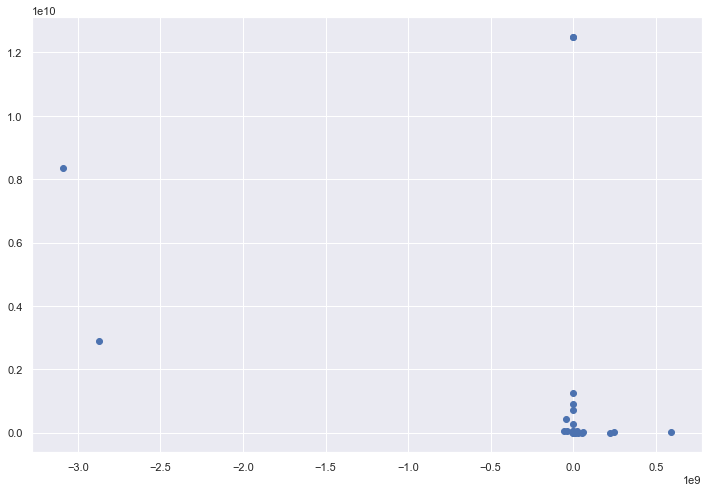

In [149]:
plt.figure(figsize=(12,8))
plt.scatter(df_results_tree['Residual'], df_results_tree['Predicted'])